In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
import pandas as pd

sns.set_theme()

In [49]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/rotated_tasks_exp_[2, 3].csv")

In [50]:
n = 100
df["m"] = df["m"]/n

In [51]:
del df["Unnamed: 0"]

In [52]:
dfm = df.melt(['m', 'r'], var_name='Alpha', value_name='Risk')

(0.0, 50.0)

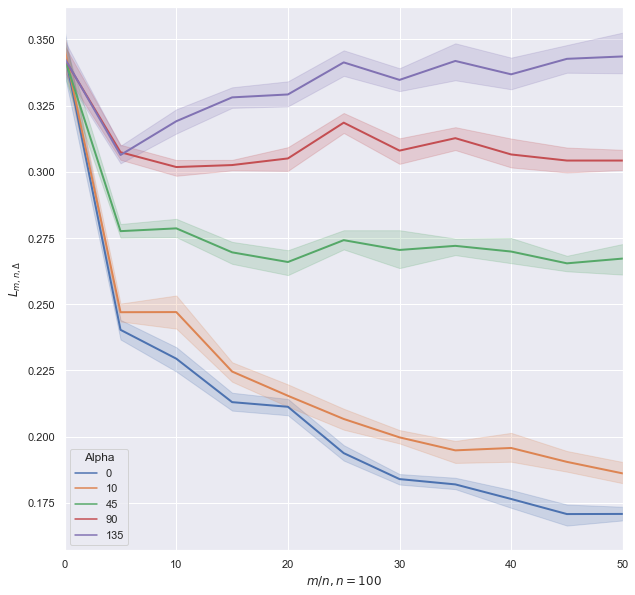

In [37]:
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Alpha", ax=ax, markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 50])

In [39]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/rotated_BvC.svg", bbox_inches="tight")

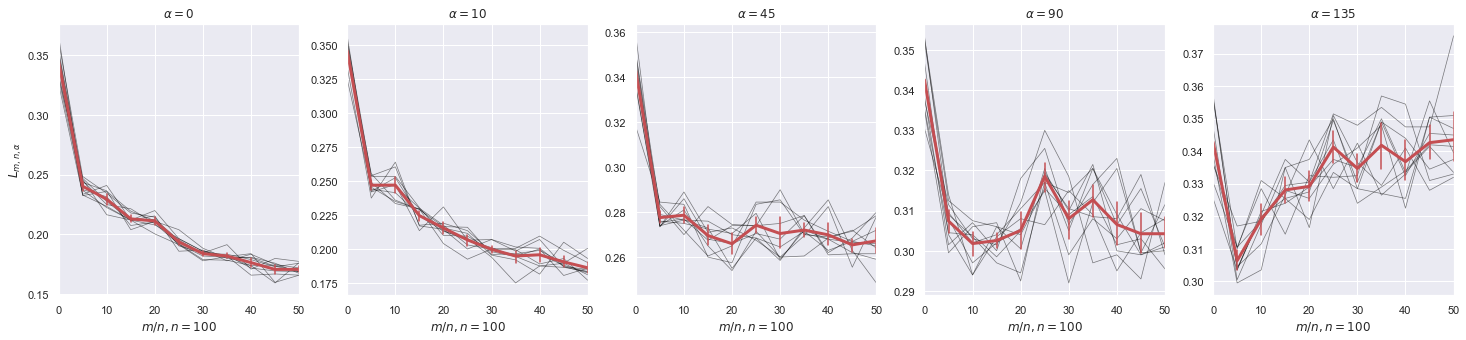

In [55]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5), facecolor='white')
axs = axs.ravel()
Alpha = [0, 10, 45, 90, 135]
for i, alpha in enumerate(Alpha):
    ax = sns.lineplot(data=df, x="m", y=str(alpha), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[i], estimator=None, lw=0.7, alpha=0.5, legend=False)
    ax = sns.lineplot(data=df, x="m", y=str(alpha), ax=ax, markers=True, color='r', err_style="bars", lw=3)
    ax.set_title(r"$\alpha = {}$".format(str(alpha)))
    ax.set_xlabel("")
    ax.set_ylabel("")
    if i == 0:
        ax.set_ylabel(r"$L_{m, n, \alpha}$")
    ax.set_xlabel(r"$m/n, n=100$")
    ax.set_xlim([0, 50])

In [56]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/rotated_BvC_reps.svg", bbox_inches="tight")

---

In [2]:
filename = "cifar10_smallconv_singlehead_dual_tasks_T2_T3"

In [202]:
df = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [203]:
n = 100
df["m"] = df["m"]/n

In [204]:
del df["Unnamed: 0"]

In [205]:
dfm = df.melt(['m', 'r'], var_name='Task', value_name='Risk')

(0.11979999999999988, 0.2452)

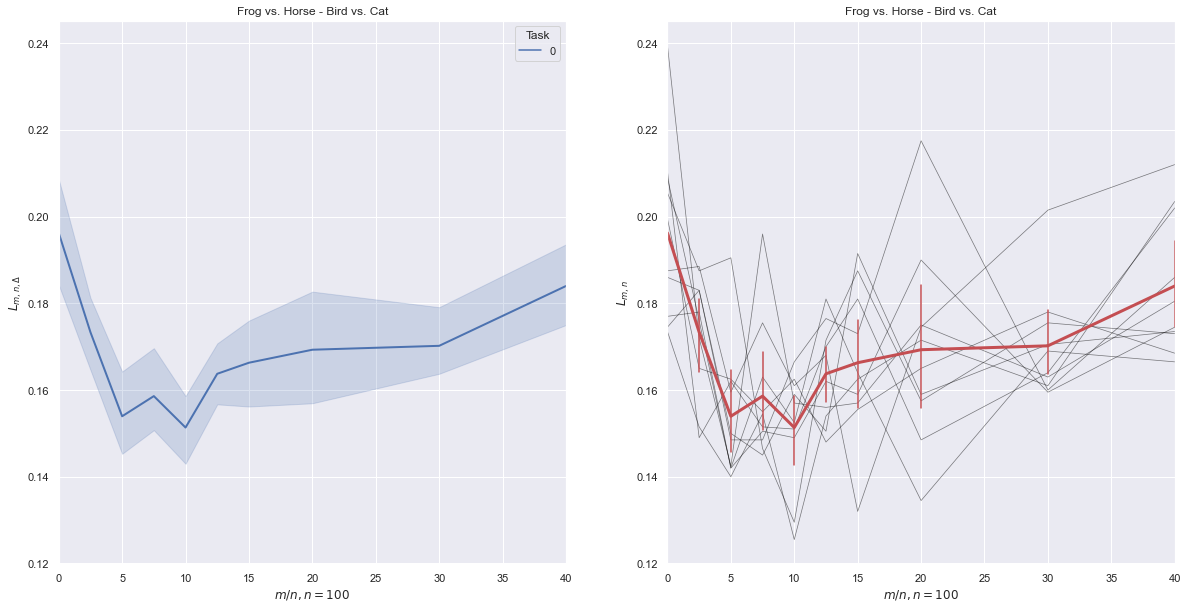

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')

ax = sns.lineplot(data=dfm, x="m", y="Risk", hue="Task", ax=axs[0], markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
ax.set_xlim([0, 40])
ax.set_title("Frog vs. Horse - Bird vs. Cat")

ax = sns.lineplot(data=df, x="m", y=str(0), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[1], estimator=None, lw=0.7, alpha=0.5, legend=False)
ax = sns.lineplot(data=df, x="m", y=str(0), ax=ax, markers=True, color='r', err_style="bars", lw=3)
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlim([0, 40])
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlabel(r"$m/n, n=100$")
ax.set_title("Frog vs. Horse - Bird vs. Cat")

axs[0].set_ylim(ax.get_ylim())

In [216]:
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [26]:
filename1 = "cifar10_SmallConv_singlehead_v2/cifar10_smallconv_singlehead_dual_tasks_T1"
filename2 = "cifar10_SmallConv_singlehead_v2/cifar10_smallconv_singlehead_dual_tasks_T2"
filename3 = "cifar10_SmallConv_singlehead_v2/cifar10_smallconv_singlehead_dual_tasks_T3"
# filename4 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T4"
# filename5 = "cifar10_WideResNet_multihead_larger_m/cifar10_wrn_multihead_dual_tasks_T5"

In [27]:
df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename1))
df2 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename2))
df3 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename3))
# df4 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename4))
# df5 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename5))

In [314]:
# n = 100
# df1["m"] = df1["m"]/n
# df2["m"] = df2["m"]/n
# df3["m"] = df3["m"]/n
# df4["m"] = df4["m"]/n
# df5["m"] = df5["m"]/n

In [28]:
dfs = [df1, df2, df3] # df4, df5]

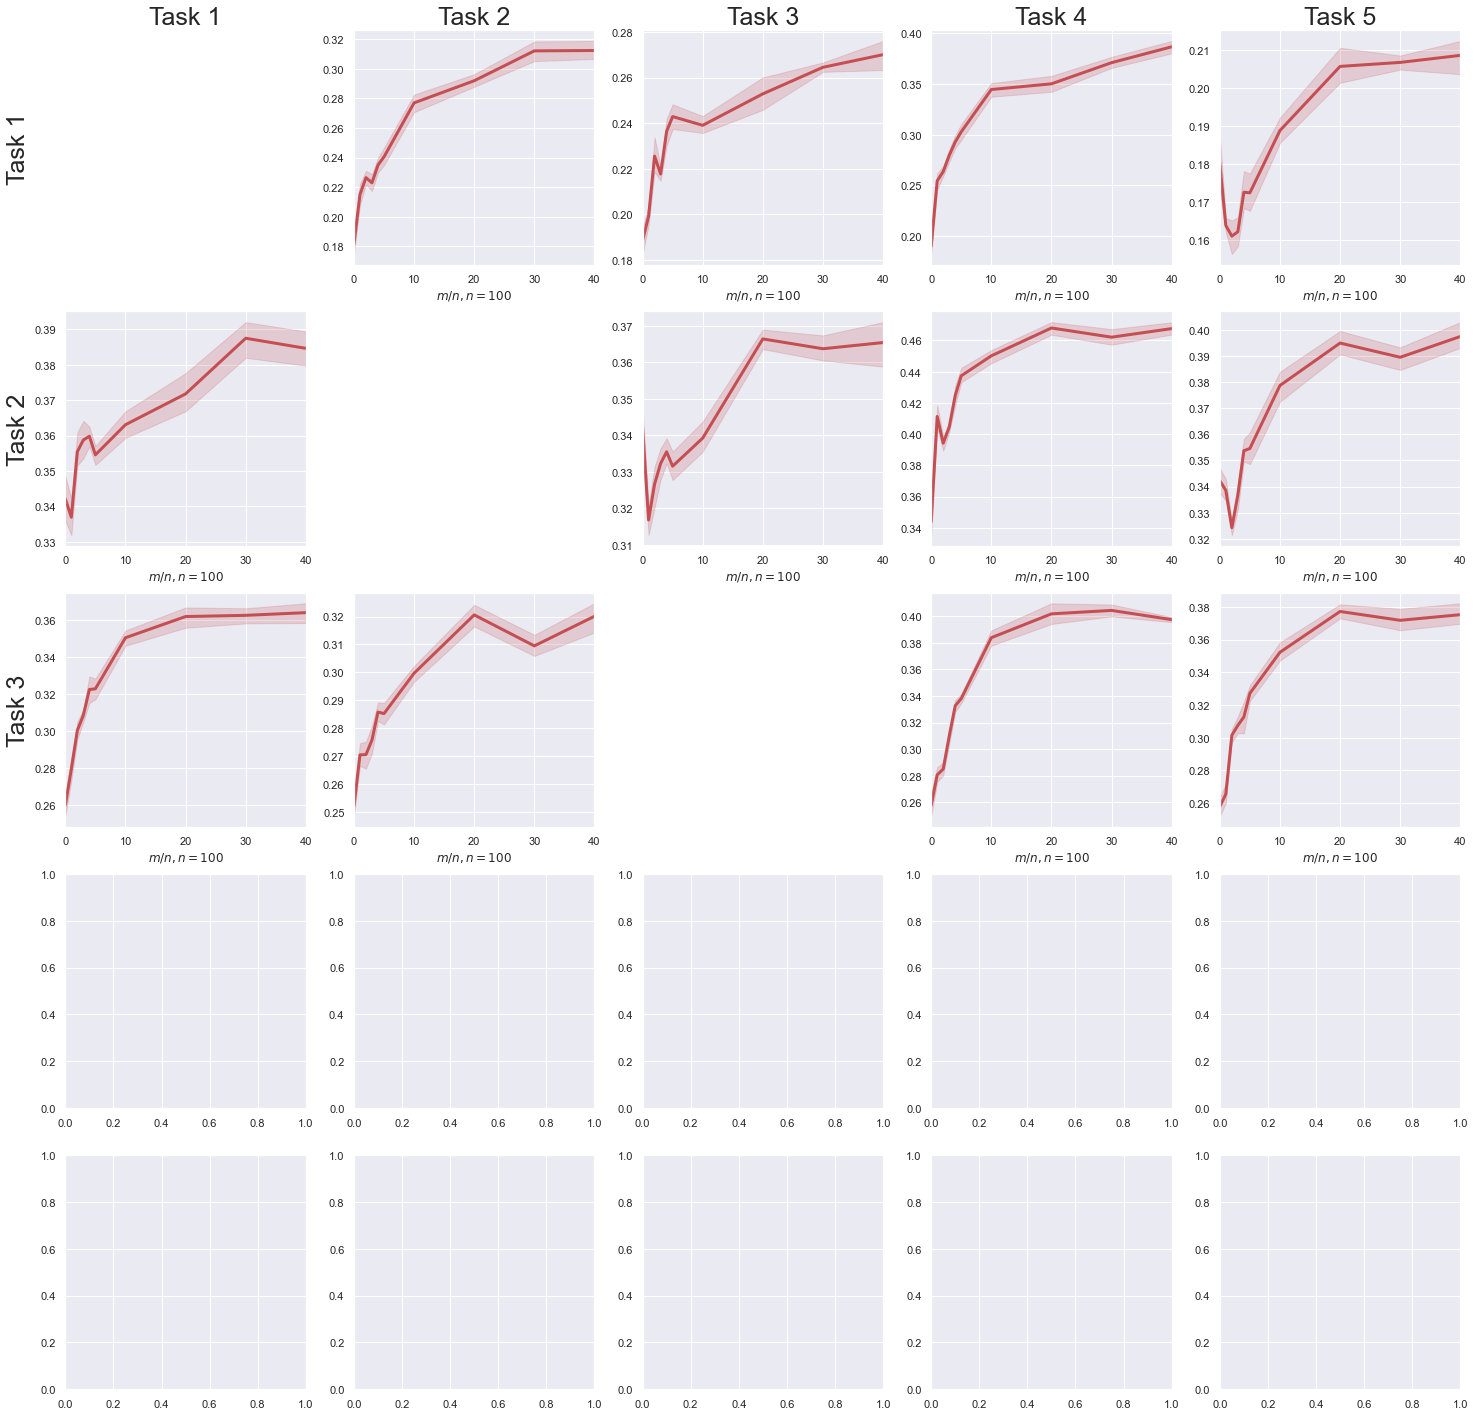

In [29]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25), facecolor='white')
for i, df in enumerate(dfs):
    for j in range(5):
        axs[i][j].set_ylabel(" ")
        if i == 0:
            axs[i][j].set_title("Task {}".format(j+1), fontsize=25)
        if j == 0:
            axs[i][j].set_ylabel("Task {}".format(i+1), fontsize=25)
        if j == i:
            axs[i][j].axis('off')
            if i == 0: 
                axs[i][j].axis('on')
                axs[i][j].set_ylabel("Task 1",fontsize=25)
                axs[i][j].xaxis.set_visible(False)
                axs[i][j].patch.set_visible(False)
                axs[i][j].set_ylim([0.10, 0.36])
                axs[i][j].tick_params(axis='y', colors='white')
            continue
        ax = sns.lineplot(data=df, x="m", y=str(j+1), ax=axs[i][j], markers=True, color='r', lw=3)
        ax.set_xlim([0, 40])
        # ax.set_ylim([0.10, 0.40])
        ax.set_xlabel(r"$m/n, n=100$")

In [8]:
filename = "cifar_wrn_multihead_larger_m"
fig.savefig("/Users/ashwindesilva/research/ood-tl/reports/figures/{}.svg".format(filename), bbox_inches="tight")

---

In [10]:
filename = "cifar10_SmallConv_singlehead/cifar10_smallconv_singlehead_dual_tasks_T2_T3"
df1 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [ ]:
filename = "cifar10_SmallConv_singlehead/cifar10_smallconv_singlehead_dual_tasks_weighted_T2_T3"
df2 = pd.read_csv("/Users/ashwindesilva/research/ood-tl/experiments/results/{}.csv".format(filename))

In [13]:
del df1["Unnamed: 0"]
del df2["Unnamed: 0"]

In [16]:
dfm1 = df1.melt(['m', 'r'], var_name='Task', value_name='Risk')
dfm2 = df2.melt(['m', 'r'], var_name='Task', value_name='Risk')

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), facecolor='white')

ax = sns.lineplot(data=dfm1, x="m", y="Risk", hue="Task", ax=axs[0][0], markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
# ax.set_xlim([0, 90])
ax.set_title("Frog vs. Horse - Bird vs. Cat")

ax = sns.lineplot(data=df1, x="m", y=str(3), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[0][1], estimator=None, lw=0.7, alpha=0.5, legend=False)
ax = sns.lineplot(data=df1, x="m", y=str(3), ax=ax, markers=True, color='r', err_style="bars", lw=3)
ax.set_ylabel(r"$L_{m, n}$")
# ax.set_xlim([0, 90])
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlabel(r"$m/n, n=100$")
ax.set_title("Frog vs. Horse - Bird vs. Cat")

axs[0][1].set_ylim(ax.get_ylim())

ax = sns.lineplot(data=dfm2, x="m", y="Risk", hue="Task", ax=axs[1][0], markers=True, ci=95, lw=2)
ax.set_ylabel(r"$L_{m, n, \Delta}$")
ax.set_xlabel(r"$m/n, n = 100$")
# ax.set_xlim([0, 90])
ax.set_title("Frog vs. Horse - Bird vs. Cat")

ax = sns.lineplot(data=df2, x="m", y=str(3), hue="r", palette=sns.color_palette(['black'], len(df["r"].unique())), ax=axs[1][1], estimator=None, lw=0.7, alpha=0.5, legend=False)
ax = sns.lineplot(data=df2, x="m", y=str(3), ax=ax, markers=True, color='r', err_style="bars", lw=3)
ax.set_ylabel(r"$L_{m, n}$")
# ax.set_xlim([0, 90])
ax.set_ylabel(r"$L_{m, n}$")
ax.set_xlabel(r"$m/n, n=100$")
ax.set_title("Frog vs. Horse - Bird vs. Cat")

axs[1][1].set_ylim(ax.get_ylim())
